In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [32]:
y = df["life"].values
X = df["fertility"].values

In [4]:
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)


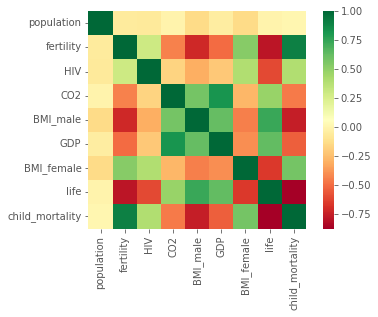

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.heatmap(df.corr(), square=True, cmap="RdYlGn")
plt.show()

In [33]:
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)

In [7]:
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


In [8]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
prediction_space = np.linspace(min(X_reshaped), max(X_reshaped)).reshape(-1,1)

reg.fit(X_reshaped, y_reshaped)

y_pred = reg.predict(prediction_space)

print(reg.score(X_reshaped, y_reshaped))

0.6192442167740035


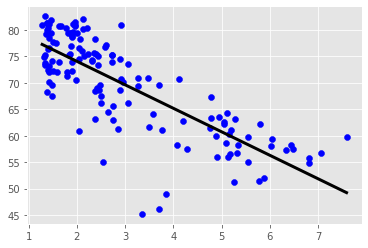

In [9]:
plt.scatter(X_reshaped, y_reshaped, color="blue")
plt.plot(prediction_space, y_pred, color="black", linewidth=3)
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("R^2: {}".format(reg.score(X_test, y_test)))

R^2: 0.7298987360907494


In [11]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.194027914110243


### 5-fold cross-validation

In [12]:
from sklearn.model_selection import cross_val_score
regressor = LinearRegression();

cv_scores = cross_val_score(regressor, X_reshaped, y_reshaped, cv=5)
print(cv_scores)

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]


In [13]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.6168819644425119


In [14]:
cv_scores_3 = cross_val_score(regressor, X_reshaped, y_reshaped, cv=3)
print(np.mean(cv_scores_3))

cv_scores_10 = cross_val_score(regressor, X_reshaped, y_reshaped, cv=10)
print(np.mean(cv_scores_10))

0.6294715754653507
0.5883937741571185


In [15]:
%timeit cross_val_score(regressor, X_reshaped, y_reshaped, cv=3)

2.01 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%timeit cross_val_score(regressor, X_reshaped, y_reshaped, cv=10)

6.22 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
